In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'tensorflow'

In [139]:
raw_df = pd.read_csv('C:/Users/jiyeon/OneDrive - 강원대학교/kma_pjt/data/일단있는애들먼저4.csv', encoding="CP949") 
raw_df.drop(['Unnamed: 0'], axis=1, inplace=True)
raw_df.head()

,yyyymmdd,add,sex,frequency,avg_ta_x,max_ta_x,min_ta_x,min_mrng_ta,max_dytm_ta,min_nght_ta,...,max_td_hrmt,min_td,min_td_hrmt,avg_rhm,min_rhm,so2,co,o3,no2,pm10
0,20120101,강원,1,3,-3.804615,0.411282,-8.386667,-5.592308,0.383590,-10.593333,...,777.142857,-12.144286,1442.857143,68.693434,45.636364,0.010033,1.012879,0.019098,0.020873,84.337500
1,20120101,강원,2,3,-3.804615,0.411282,-8.386667,-5.592308,0.383590,-10.593333,...,777.142857,-12.144286,1442.857143,68.693434,45.636364,0.010033,1.012879,0.019098,0.020873,84.337500
2,20120101,경기,1,4,-3.987711,0.339116,-8.952530,-5.113253,0.283213,-12.036867,...,980.000000,-12.320000,1720.000000,73.601587,49.491534,0.009196,0.978231,0.011926,0.030821,86.678511
3,20120101,경기,2,5,-3.987711,0.339116,-8.952530,-5.113253,0.283213,-12.036867,...,980.000000,-12.320000,1720.000000,73.601587,49.491534,0.009196,0.978231,0.011926,0.030821,86.678511
4,20120101,경남,1,2,0.502326,5.804651,-4.083721,-2.430233,5.804651,-7.290698,...,1607.142857,-11.435714,1114.285714,61.048437,41.115938,0.008975,0.653175,0.021260,0.017499,62.025845


In [140]:
condition = (raw_df['add']=='서울') & (raw_df['sex']==1) 
seoul_1 = raw_df.copy()[condition]
seoul_1.drop(['add', 'sex'], axis=1, inplace=True)
seoul_1.describe()

,yyyymmdd,frequency,avg_ta_x,max_ta_x,min_ta_x,min_mrng_ta,max_dytm_ta,min_nght_ta,avg_ps,max_ps,...,max_td_hrmt,min_td,min_td_hrmt,avg_rhm,min_rhm,so2,co,o3,no2,pm10
count,1.461000e+03,1461.00000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2.013566e+07,3.65024,12.845728,17.614296,8.748829,9.234287,17.483995,9.162266,1016.091102,1018.698494,...,1062.734428,1.011583,1099.761579,65.819745,44.040833,0.005574,0.581480,0.019429,0.038675,46.687874
std,1.119295e+04,2.04977,10.638229,10.988530,10.716847,10.640255,11.104681,10.653071,8.262597,8.313166,...,861.767418,12.949378,692.280818,14.050390,16.158317,0.001739,0.201804,0.010251,0.011940,28.224096
min,2.012010e+07,0.00000,-13.154167,-9.491667,-16.908333,-16.908333,-9.500000,-16.908333,992.900000,998.000000,...,0.000000,-28.200000,0.000000,25.611111,11.394444,0.002838,0.232057,0.001953,0.010000,6.351319
25%,2.012123e+07,2.00000,3.454167,7.850000,-0.537500,0.179167,7.533333,0.041667,1009.400000,1011.700000,...,100.000000,-9.700000,400.000000,56.388889,31.872222,0.004386,0.440397,0.011489,0.029559,30.127682
50%,2.013123e+07,3.00000,14.145833,19.483333,9.641667,10.233333,19.466667,10.191667,1016.400000,1019.200000,...,1100.000000,1.900000,1200.000000,66.166667,43.022222,0.005217,0.529863,0.018090,0.037092,41.583333
75%,2.014123e+07,5.00000,22.603333,27.666667,18.507500,18.795833,27.662500,18.791667,1022.400000,1025.100000,...,1900.000000,12.400000,1600.000000,75.536111,53.955556,0.006364,0.662788,0.026391,0.046555,57.146341
max,2.015123e+07,12.00000,31.358333,36.583333,27.841667,27.929167,36.583333,27.870833,1037.600000,1039.500000,...,2300.000000,24.100000,2300.000000,97.388889,94.394444,0.021062,1.660833,0.064291,0.082474,555.692308


In [141]:
seoul_1.isnull().sum()
seoul_1.columns

Index(['yyyymmdd', 'frequency', 'avg_ta_x', 'max_ta_x', 'min_ta_x',
       'min_mrng_ta', 'max_dytm_ta', 'min_nght_ta', 'avg_ps', 'max_ps',
       'min_ps', 'avg_ta_y', 'max_ta_y', 'min_ta_y', 'avg_td', 'max_td',
       'max_td_hrmt', 'min_td', 'min_td_hrmt', 'avg_rhm', 'min_rhm', 'so2',
       'co', 'o3', 'no2', 'pm10'],
      dtype='object')

In [142]:
# 정규화 (Date 제외한 모든 수치부분 정규화)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['avg_ta_x', 'max_ta_x', 
              'min_ta_x', 'min_mrng_ta', 'max_dytm_ta', 'min_nght_ta', 'avg_ps',
              'max_ps', 'min_ps', 'avg_ta_y', 'max_ta_y', 'min_ta_y', 'avg_td',
              'max_td', 'max_td_hrmt', 'min_td', 'min_td_hrmt', 'avg_rhm', 'min_rhm',
              'so2', 'co', 'o3', 'no2', 'pm10']

scaled_df = scaler.fit_transform(seoul_1[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

scaler_frq = MinMaxScaler()
scaled_df['frequency'] = scaler_frq.fit_transform(seoul_1['frequency'].values.reshape(-1,1))

# print(scaled_df)

In [143]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [144]:
# feature_df, label_df 생성

feature_cols = ['avg_ta_x', 'max_ta_x', 
                'min_ta_x', 'min_mrng_ta', 'max_dytm_ta', 'min_nght_ta', 'avg_ps',
                'max_ps', 'min_ps', 'avg_ta_y', 'max_ta_y', 'min_ta_y', 'avg_td',
                'max_td', 'max_td_hrmt', 'min_td', 'min_td_hrmt', 'avg_rhm', 'min_rhm',
                'so2', 'co', 'o3', 'no2', 'pm10']
label_cols = ['frequency']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [145]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(1461, 24) (1461, 1)


In [146]:
# 시계열 데이터 생성 (make_sequence_dataset)

window_size = 90

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(1371, 90, 24) (1371, 1)


In [147]:
# 학습데이터, 테스트데이터 생성

# train, test 분리

# split = int(len(X)-365)

x_train = X[0:-365]
y_train = Y[0:-365]

x_test = X[-365:]
y_test = Y[-365:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1006, 90, 24) (1006, 1)
(365, 90, 24) (365, 1)


In [148]:
# 모델 구축 및 컴파일

# model 생성

model = Sequential()

model.add(LSTM(128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

# model.summary()

In [149]:
# 모델 학습 (EarlyStopping 적용)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=100, batch_size=32,
          callbacks=[early_stop])

Epoch 1/100
32/32 [==============================] - 6s 84ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 2/100
32/32 [==============================] - 2s 68ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 3/100
32/32 [==============================] - 2s 71ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 4/100
32/32 [==============================] - 3s 93ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 5/100
32/32 [==============================] - 2s 74ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 6/100
32/32 [==============================] - 2s 73ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 7/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 8/100
32/32 [==============================] - 3s 92ms/step - loss: 0.

12/12 [==============================] - 1s 27ms/step


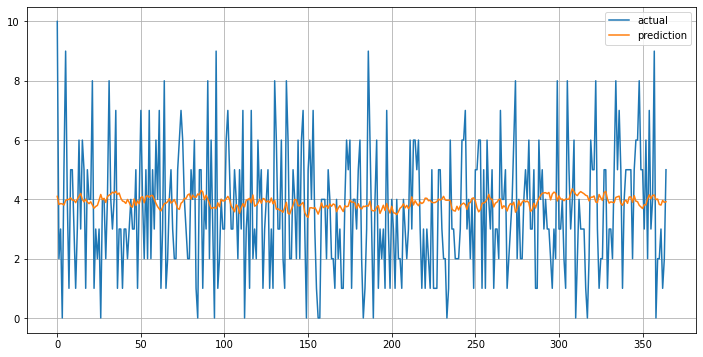

In [150]:
# 예측을 통한 정답과의 비교 (오차계산 MAPE 사용, 평균절대값백분율오차)

pred = model.predict(x_test)
rescaled_y_test = scaler_frq.inverse_transform(np.array(y_test).reshape(-1,1))
rescaled_pred = scaler_frq.inverse_transform(np.array(pred).reshape(-1,1))
plt.figure(figsize=(12, 6))
# plt.title('3MA + 5MA + Adj Close, window_size=40')
# plt.ylabel('adj close')
# plt.xlabel('period')
plt.plot(rescaled_y_test, label='actual')
plt.plot(rescaled_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [151]:
# rmse

print(mean_squared_error(rescaled_y_test, rescaled_pred, squared=False))

2.089638502260164
